In [1]:
setwd('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1001. InVitroWildfire EVProteomics/P1001.3. Analyses/P1001.3.6. Volcano Plot/Input')
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1001. InVitroWildfire EVProteomics/P1001.3. Analyses/P1001.3.6. Volcano Plot/Output')
cur_date = "070122"

library(readxl)
library(tidyverse)
library(reshape2)
library(ggrepel)
library(MetBrewer)

#reading in file
protein_df = data.frame(read_excel("070122_Statistical_Results_Only.xlsx")) %>%
    mutate(Treatment = ifelse(Treatment == "CoCulture", "Co-Culture", "Tri-Culture"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
head(protein_df)

,Set,Treatment,Protein,Gene.name,log2FC,Statistic,P.Value,P.Adj
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Set1,Co-Culture,P02769,SWISS-PROT:P02769 (Bos taurus) Bovine serum albumin precursor,0.17688542,-1.61348542,0.1379589,0.6200999
2,Set1,Co-Culture,P02751,FN1,-0.09664782,0.58832972,0.5755262,0.8024404
3,Set1,Co-Culture,P12763,SWISS-PROT:P12763 (Bos taurus) Alpha-2-HS-glycoprotein precursor,0.04137128,-0.88946362,0.3975197,0.7191816
4,Set1,Co-Culture,Q2UVX4,SWISS-PROT:Q2UVX4 (Bos taurus) Complement C3 precursor,-0.01086488,0.05995793,0.9535929,0.9794194
5,Set1,Co-Culture,P98160,HSPG2,-0.37199408,1.45465153,0.1775142,0.6434890
6,Set1,Co-Culture,P12111,COL6A3,0.25760674,-1.54815599,0.1622044,0.6340786


In [3]:
# adding a col to denote whether a protein had increased or decreased expression

# add a column of NAs
protein_df$diffexpressed <- "No Significance"

# if log2FC > log2(1.5) and P.Adj < 0.05, set as "UP" 
protein_df$diffexpressed[protein_df$log2FC > log2(1.5) & protein_df$P.Adj < 0.1] <- "Increased Significantly"

# if log2FC < -log2(1.5) and P.Adj < 0.05, set as "DOWN"
protein_df$diffexpressed[protein_df$log2FC < -log2(1.5) & protein_df$P.Adj < 0.1] <- "Decreased Significantly"

protein_df$diffexpressed = factor(protein_df$diffexpressed, levels = c("Decreased Significantly", "Increased Significantly", "No Significance"))

# P Value Version

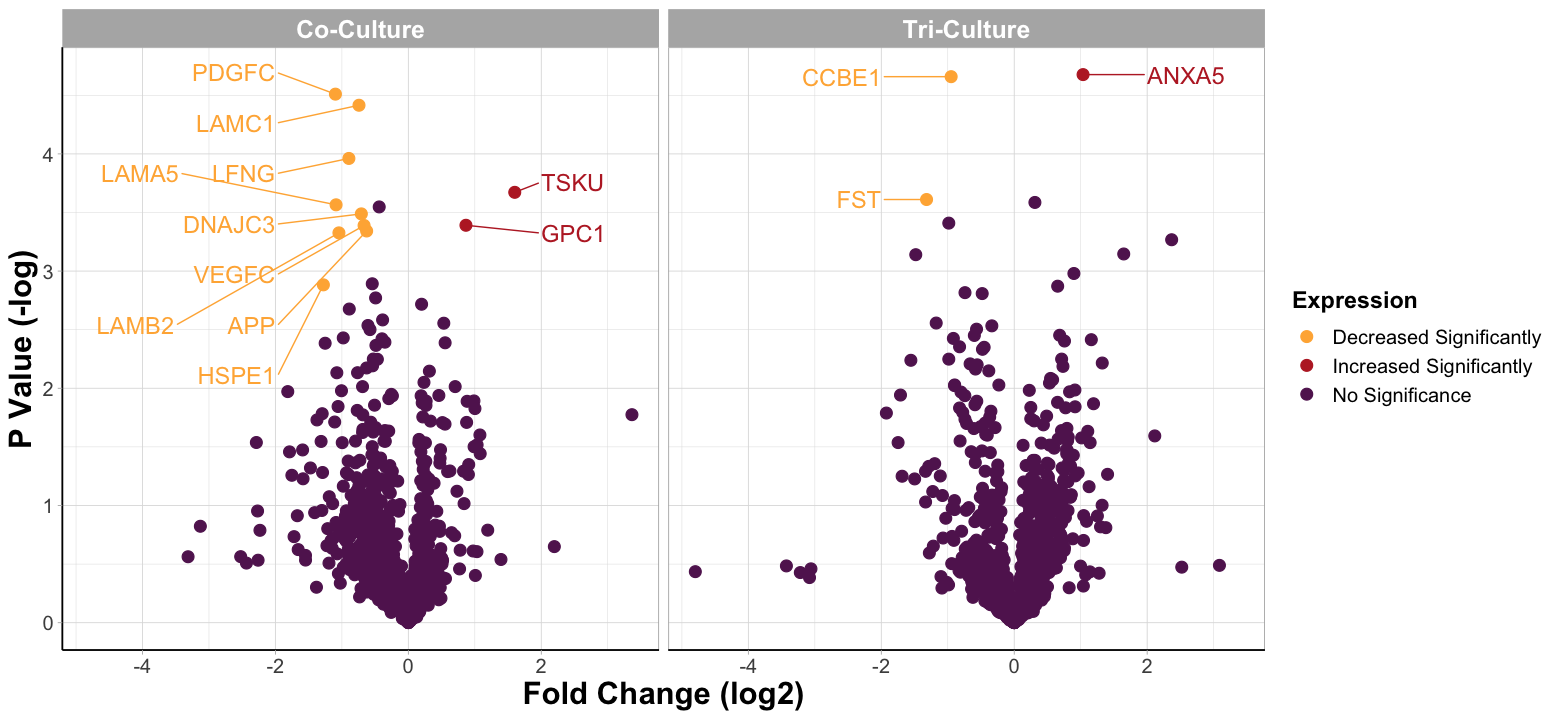

In [4]:
options(repr.plot.width=13, repr.plot.height=6) #changing size

#choosing palette from package
metbrewer_colors = MetPalettes$Tam[[1]]

ggplot() + 
  geom_point(data = protein_df, aes(x = log2FC, y = -log10(P.Value), color = diffexpressed), size = 3) + 

  #labeling points with statistical significance and FC
  geom_text_repel(data = protein_df %>%
                      filter(abs(log2FC) > log2(1.5) & P.Value < 0.1 & diffexpressed == "Increased Significantly"), 
    aes(x = log2FC, y = -log10(P.Value), label = Gene.name, color = diffexpressed),
    xlim = c(2, NA),
    hjust = 0,
    segment.size = 0.4,
     box.padding = 0.7,
     max.overlaps = Inf,
    size = 5, 
    show.legend = FALSE) + 

  geom_text_repel(data = protein_df %>%
                      filter(abs(log2FC) > log2(1.5) & P.Value < 0.1 & diffexpressed == "Decreased Significantly"), 
    aes(x = log2FC, y = -log10(P.Value), label = Gene.name, color = diffexpressed),
    xlim = c(NA, -2),
    hjust = 1,
    segment.size = 0.4,
     box.padding = 0.7,
     max.overlaps = Inf,
    size = 5, 
    show.legend = FALSE) + 

  facet_wrap(~Treatment) + 

  theme_light() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  labs(x = 'Fold Change (log2)', y = 'P Value (-log)') + 

  scale_color_manual(name = "Expression",
                      values = c(metbrewer_colors[2], metbrewer_colors[5], metbrewer_colors[7]))

# P Adjust Version

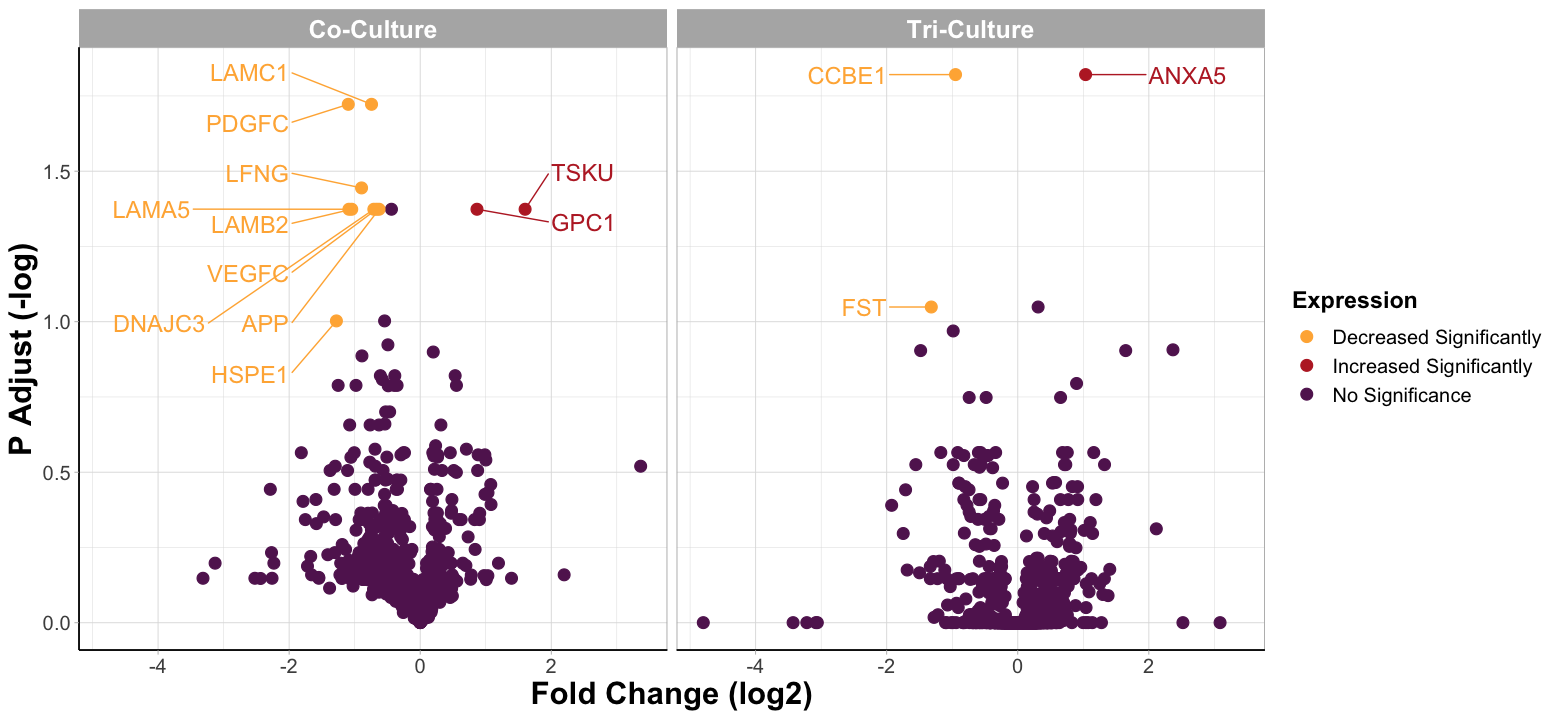

In [5]:
options(repr.plot.width=13, repr.plot.height=6) #changing size

#choosing palette from package
metbrewer_colors = MetPalettes$Tam[[1]]

ggplot() + 
  geom_point(data = protein_df, aes(x = log2FC, y = -log10(P.Adj), color = diffexpressed), size = 3) + 

  #labeling points with statistical significance and FC
  geom_text_repel(data = protein_df %>%
                      filter(abs(log2FC) > log2(1.5) & P.Adj < 0.1 & diffexpressed == "Increased Significantly"), 
    aes(x = log2FC, y = -log10(P.Adj), label = Gene.name, color = diffexpressed),
    xlim = c(2, NA),
    hjust = 0,
    segment.size = 0.4,
     box.padding = 0.7,
     max.overlaps = Inf,
    size = 5, 
    show.legend = FALSE) + 

  geom_text_repel(data = protein_df %>%
                      filter(abs(log2FC) > log2(1.5) & P.Adj < 0.1 & diffexpressed == "Decreased Significantly"), 
    aes(x = log2FC, y = -log10(P.Adj), label = Gene.name, color = diffexpressed),
    xlim = c(NA, -2),
    hjust = 1,
    segment.size = 0.4,
     box.padding = 0.7,
     max.overlaps = Inf,
    size = 5, 
    show.legend = FALSE) + 

  facet_wrap(~Treatment) + 

  theme_light() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  labs(x = 'Fold Change (log2)', y = 'P Adjust (-log)') + 

  scale_color_manual(name = "Expression",
                      values = c(metbrewer_colors[2], metbrewer_colors[5], metbrewer_colors[7]))